In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Using Different Methods on Titanic Problem

### Load Dataset

In [2]:
dataset=pd.read_csv('train.csv')

In [3]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Cleaning Dataset

In [4]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset.shape

(891, 12)

In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
dataset.fillna({'Age':dataset.Age.mean(),
                'Embarked':'S'},inplace=True)

In [9]:
dataset.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
dataset['Embarked'].isnull().sum()

0

In [11]:
dataset1=pd.get_dummies(dataset[['Sex','Embarked']])

In [12]:
dataset2=dataset.select_dtypes(exclude=['object'])

In [13]:
print(dataset2)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare
0              1         0       3  22.000000      1      0   7.2500
1              2         1       1  38.000000      1      0  71.2833
2              3         1       3  26.000000      0      0   7.9250
3              4         1       1  35.000000      1      0  53.1000
4              5         0       3  35.000000      0      0   8.0500
..           ...       ...     ...        ...    ...    ...      ...
886          887         0       2  27.000000      0      0  13.0000
887          888         1       1  19.000000      0      0  30.0000
888          889         0       3  29.699118      1      2  23.4500
889          890         1       1  26.000000      0      0  30.0000
890          891         0       3  32.000000      0      0   7.7500

[891 rows x 7 columns]


In [14]:
df=pd.concat([dataset2,dataset1],axis=1)

In [15]:
print(df)

     PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare  \
0              1         0       3  22.000000      1      0   7.2500   
1              2         1       1  38.000000      1      0  71.2833   
2              3         1       3  26.000000      0      0   7.9250   
3              4         1       1  35.000000      1      0  53.1000   
4              5         0       3  35.000000      0      0   8.0500   
..           ...       ...     ...        ...    ...    ...      ...   
886          887         0       2  27.000000      0      0  13.0000   
887          888         1       1  19.000000      0      0  30.0000   
888          889         0       3  29.699118      1      2  23.4500   
889          890         1       1  26.000000      0      0  30.0000   
890          891         0       3  32.000000      0      0   7.7500   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0             0         1           0           0           1  
1      

## Analysis of Data

In [16]:
df.head() #head of cleaned titanic dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b8d2750>,
      dtype=object)

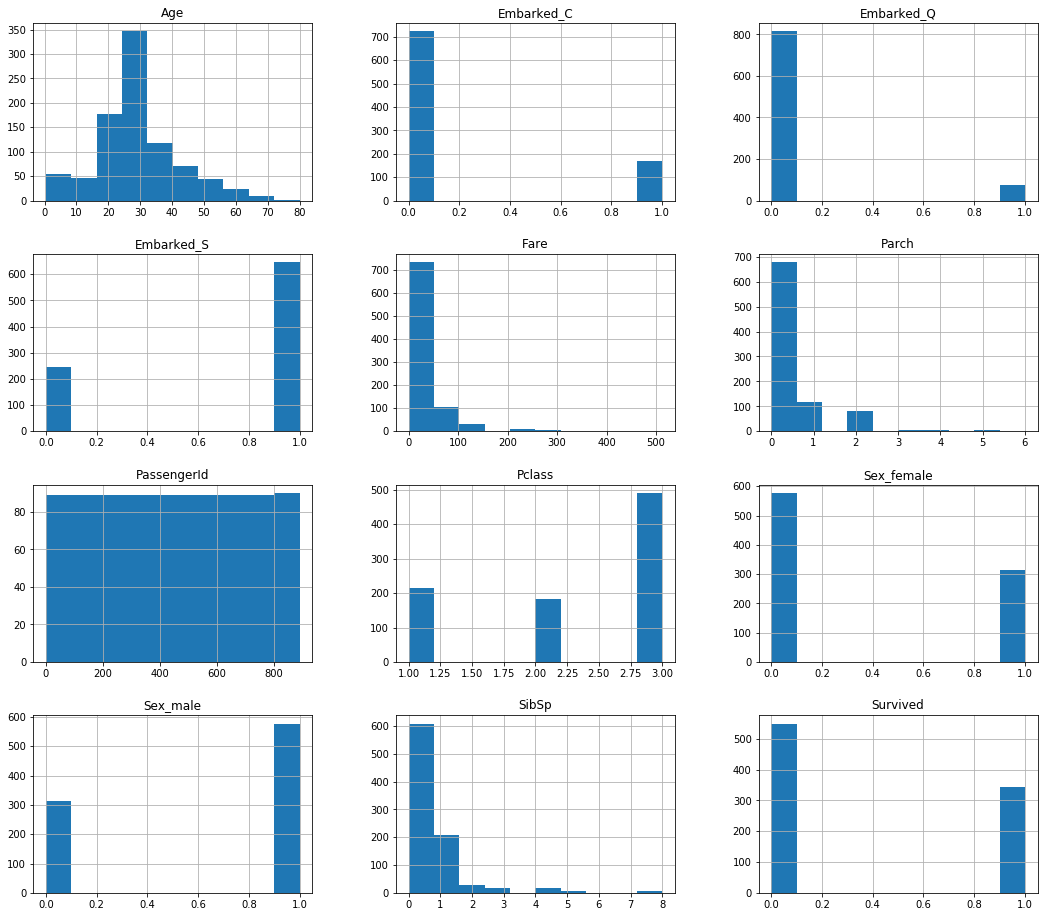

In [18]:
df.hist(figsize=(18, 16))

In [20]:

X=df.iloc[:,[2,5,6,7,8,9,10,11]].values

In [21]:
print(X)

[[ 3.      0.      7.25   ...  0.      0.      1.    ]
 [ 1.      0.     71.2833 ...  1.      0.      0.    ]
 [ 3.      0.      7.925  ...  0.      0.      1.    ]
 ...
 [ 3.      2.     23.45   ...  0.      0.      1.    ]
 [ 1.      0.     30.     ...  1.      0.      0.    ]
 [ 3.      0.      7.75   ...  0.      1.      0.    ]]


In [22]:
Y=df.iloc[:,1].values

In [23]:
df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.042939,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fc03690>,
      dtype=object)

<Figure size 1440x1280 with 0 Axes>

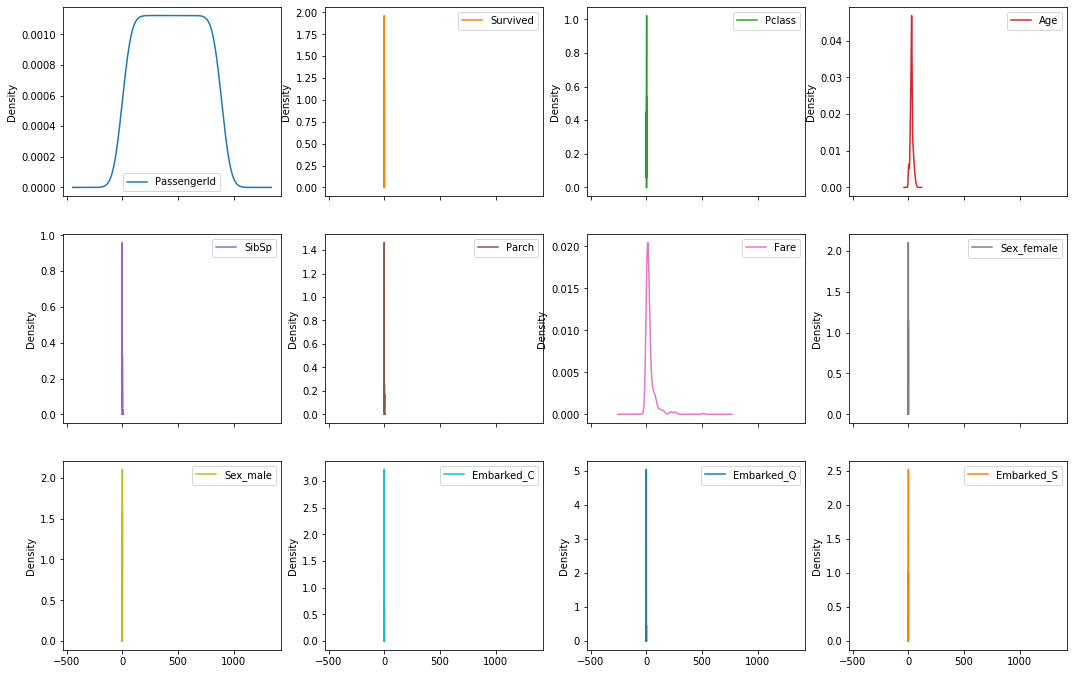

In [24]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
df.plot(kind='density',layout=(4,4),subplots=True,figsize=(18, 16))

In [25]:
##Data visualization by graph

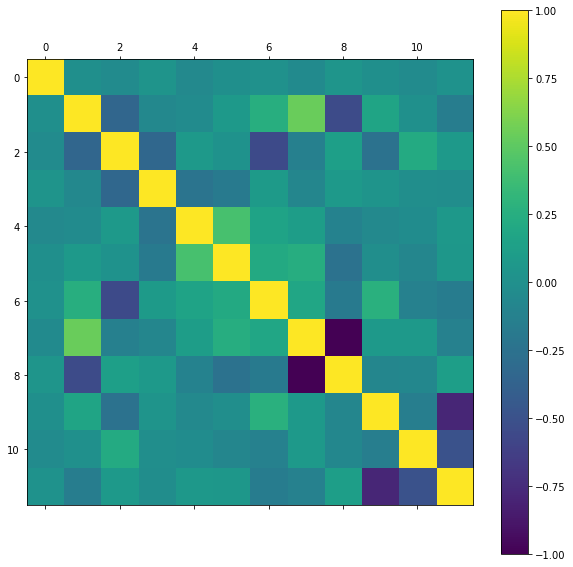

In [26]:
fig =plt.figure(figsize=(10,10))
cax=fig.add_subplot(111).matshow(df.corr(),vmin=-1,vmax=1)
fig.colorbar(cax)

## Splitting the Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#divide into train and test sets
train_X,test_X,train_Y,test_Y = train_test_split(X,Y, random_state = 10, stratify=Y,test_size=.20)

##  Building a Decision Tree Model

In [29]:
#Importing Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier

In [30]:
#creating a decision tree instance
clf = DecisionTreeClassifier(random_state=96)

In [31]:
#training the model
clf.fit(train_X,train_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=96, splitter='best')

In [32]:
#calculating score on training data
clf.score(train_X, train_Y)

0.922752808988764

In [33]:
#score on test data
clf.score(test_X, test_Y)

0.8100558659217877

In [34]:
#looking at the feature importance
clf.feature_importances_

array([0.14591945, 0.05669768, 0.38729791, 0.37793077, 0.        ,
       0.01486118, 0.00549992, 0.01179308])

## Extra Work

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import pydotplus

In [36]:
from sklearn import tree
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file="./tree12.dot")

In [37]:
dot_data = export_graphviz(clf, out_file=None,
                           filled=True,
                           rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)


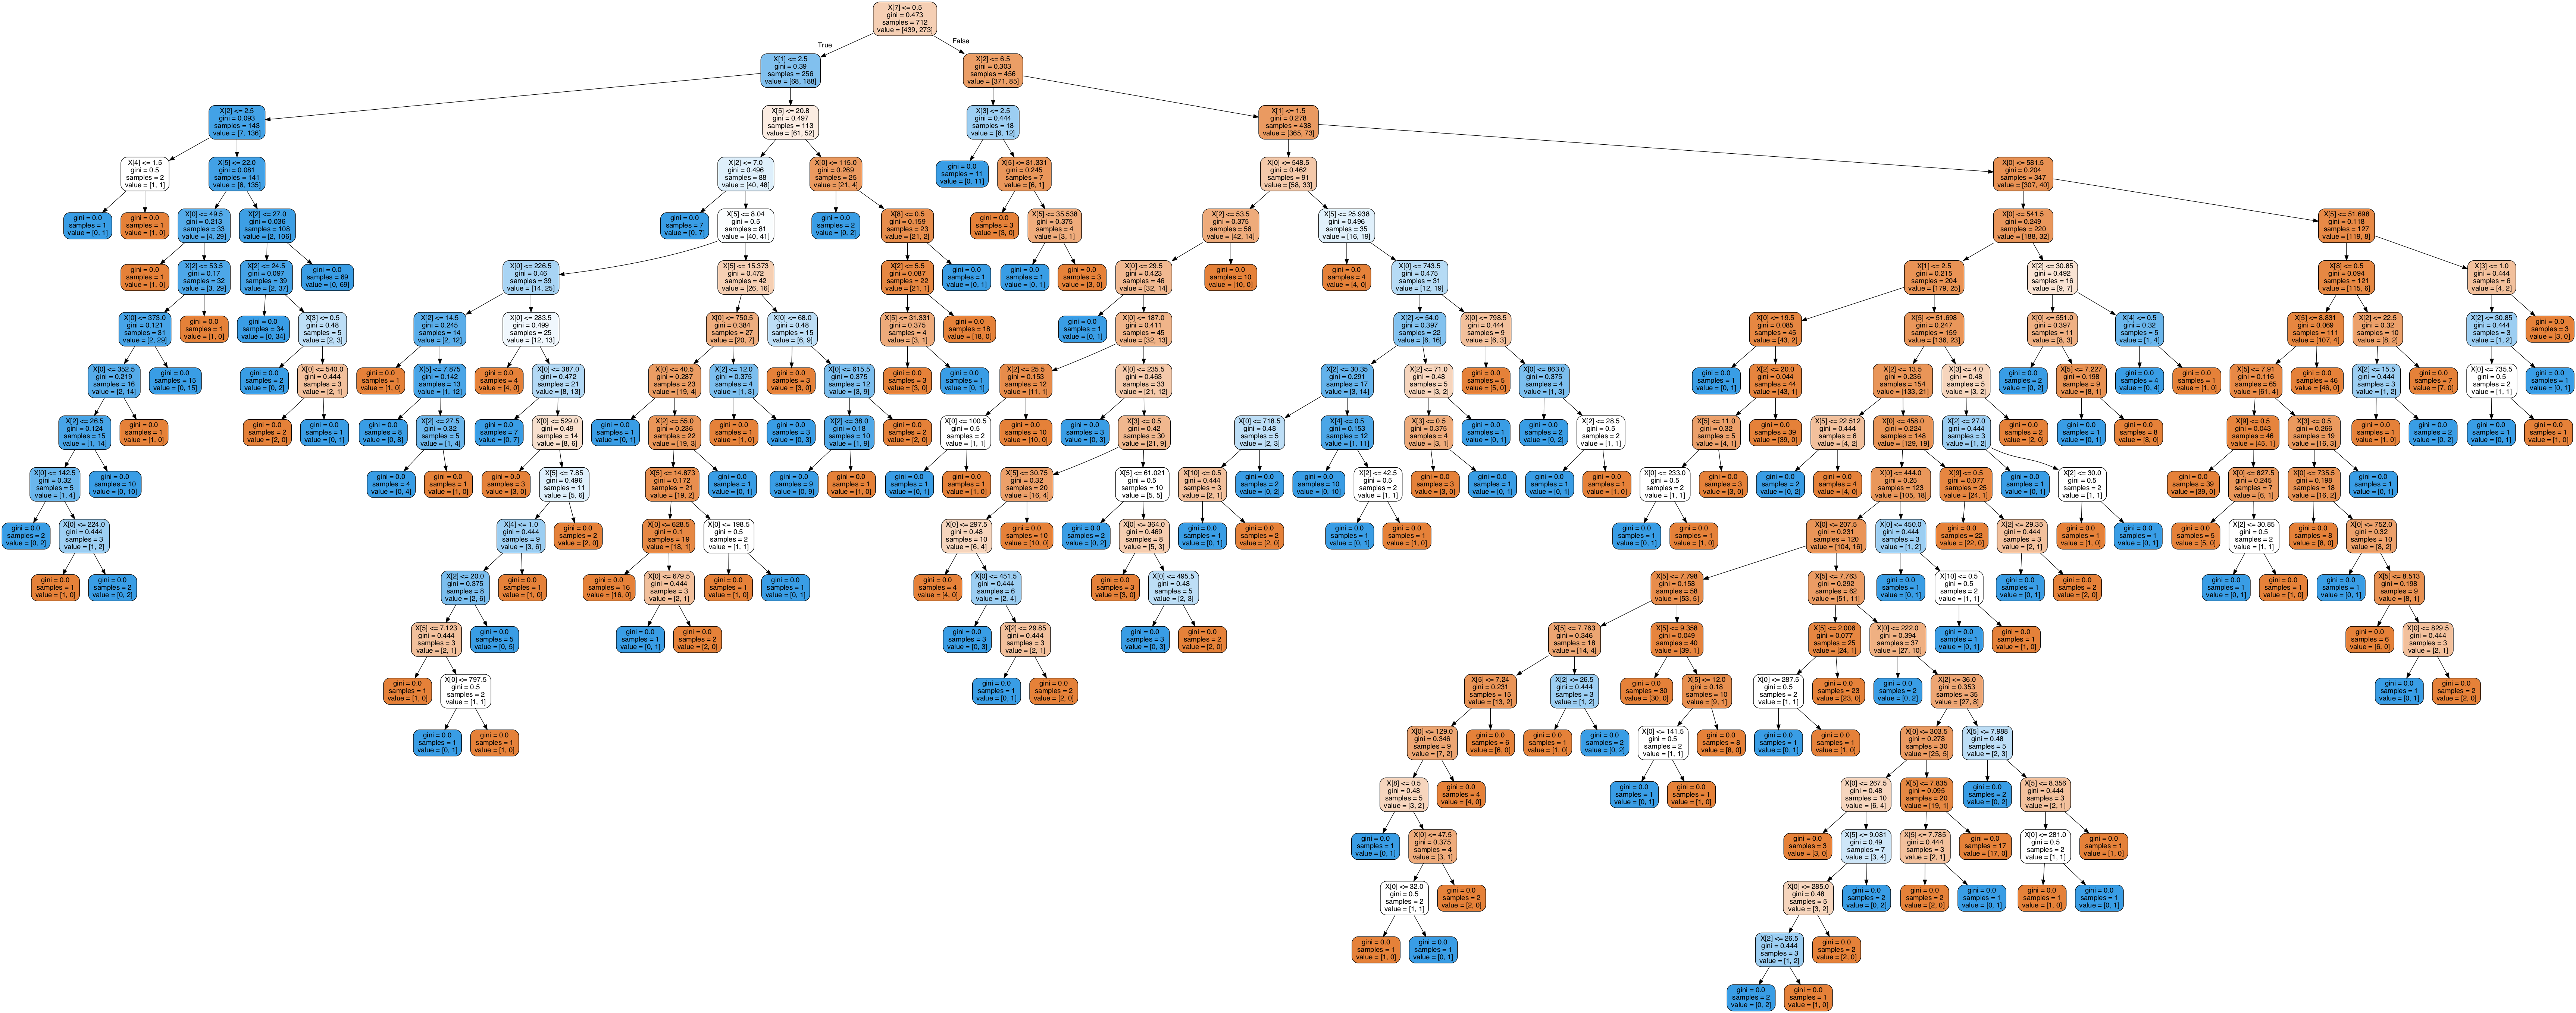

In [38]:
from IPython.display import Image
Image(filename = 'rtr12.png')

## Building a Random Forest

In [38]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [39]:
#creating a random forest instance
rclf = RandomForestClassifier(random_state=96)

In [40]:
#train the model
rclf.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=96, verbose=0,
                       warm_start=False)

In [41]:
#score on training data
rclf.score(train_X, train_Y)

0.922752808988764

In [42]:
#score on test data
rclf.score(test_X, test_Y)

0.8156424581005587

In [43]:
#looking at the feature importance
clf.feature_importances_

array([0.14591945, 0.05669768, 0.38729791, 0.37793077, 0.        ,
       0.01486118, 0.00549992, 0.01179308])

## Creating KNN model

In [44]:
x=df.drop(['Survived',"SibSp","Age"],axis=1)

In [45]:
y=df['Survived']

In [46]:
x.shape,y.shape

((891, 9), (891,))

## Scale the data

In [47]:
# Using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
Scaler=MinMaxScaler()
x_Scaled=Scaler.fit_transform(x)

In [49]:
x=pd.DataFrame(x_Scaled,columns=x.columns)

In [50]:
x.head()

,PassengerId,Pclass,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.000000,1.0,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,0.001124,0.0,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,0.002247,1.0,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,0.003371,0.0,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
4,0.004494,1.0,0.0,0.015713,0.0,1.0,0.0,0.0,1.0


### Deviding Total Dataset into Training And Testing Dataset

In [51]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 96, stratify=y)

In [52]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

In [53]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 3), X = train_x, y = train_y, cv = 10)
score

array([0.82089552, 0.73134328, 0.79104478, 0.70149254, 0.70149254,
       0.80597015, 0.86567164, 0.79104478, 0.8030303 , 0.8030303 ])

In [54]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(78.15015829941203, 5.0658719306624)

##  APPLY CROSS VALIDATION SCORE

In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10 )


# This is the default method of accuracy
scoringMethod = 'accuracy'


results = cross_val_score(rclf, X, Y,
                            cv=kfold , scoring=scoringMethod )

print(  "Random forest Accuracy: %.3f (%.3f)" % ( results.mean()*100,
                                 results.std()*100 )   )
results = cross_val_score(clf, X, Y,
                            cv=kfold , scoring=scoringMethod )

print(  "Decission tree Accuracy: %.3f (%.3f)" % ( results.mean()*100,
                                 results.std()*100 )   )

Random forest Accuracy: 80.471 (4.183)
Decission tree Accuracy: 80.469 (4.127)


# Applying KNN by using Loop and Elbow method

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
ss=StandardScaler()
x=ss.fit_transform(X)

In [58]:
y=df['Survived']

In [59]:
from sklearn.model_selection import train_test_split
#divide into train and test sets
train_X,test_X,train_Y,test_Y = train_test_split(X,Y, random_state = 5, stratify=Y)
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score


In [60]:
KNN()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
#Creating instance
clf=KNN(n_neighbors=5,metric='euclidean')
clf.fit(train_X,train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
test_predict=clf.predict(test_X)
K=f1_score(test_predict,test_Y)

In [63]:
print('test f1 score',K)

test f1 score 0.6900584795321637


## New approach using KNN (don't include it in project)

In [64]:
K=list
train_f1=[]
train_f2=[]

In [65]:
def Elbow(K):
    test_Error=[]
    for i in K:
     clf=KNN(n_neighbors=i)
     clf.fit(train_X,train_Y)
    tmp=clf.predict(train_X)
    tmp=f1_score(tmp,train_Y)
    train_f1.append(tmp)
    tmp=clf.predict(test_X)
    tmp=f1_score(tmp,test_Y)
    test_f1.append(tmp)
    return train_f1,test_f1

In [66]:
K=range(1,150)

In [67]:
train_f1,test_f1=f1_score()

TypeError: f1_score() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
'''
tmp=clf.predict(test_X)
tmp=f1_score(tmp,test_Y)
test_Error=1-tmp #(Higher the F1 Score the better is the model)
'''

In [ ]:
'''
test_error=np.array(test_Error,dtype = np.float32)
test_error=np.append(test_error,test_Error)
'''

In [ ]:
#return test_Error

In [ ]:
#Taken as reference from github for appending float value
#temperatures = []
#floatTemperatures = np.array(temperatures, dtype = np.float32)
#floatTemperatures = np.append(floatTemperatures, TEMP1)

In [ ]:
#Define K range
K=range(6,20,1)

In [ ]:
#Calling the defined function
test=Elbow(K)

In [ ]:
print(test)

In [ ]:
plt.plot(new_array_1,new_array_2)
plt.show()

In [ ]:
clf=KNN(n_neighbors=12)
clf.fit(train_X,train_Y)

In [ ]:
test_predict=clf.predict(test_X)

In [ ]:
K=f1_score(test_predict,test_Y)

In [ ]:
print('Test f1 score=',K)

## reference from github to experiment 

In [ ]:

fig, bx = plt.subplots(figsize=(4,2))
bx.plot(K, test,color='blue')
fig.suptitle('Wind Power Prediction v Measured Wind Power ', fontsize=10)
plt.xlabel('Wind Power Data')
plt.ylabel('Predicted Power')


In [ ]:
# How to plot a disimilar vector value on a graph by converting into scalar form

In [ ]:
new_array_1 = scalar.transform(array_1)
or
new_array_2 = scalar.transform(array_2)
then
mean_squared_error(new_new_array_1, new_array_2)